# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
# YOUR CODE HERE
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import argrelextrema


## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [2]:
# YOUR CODE HERE
#Import data frame of provincial data as defined in assignment 1:
df_a_province = pd.read_csv(r'C:/Users/s2161699/Documents/GitHub/TIL6010/Assignments/assignment_1/NL_province.csv')

#Print first 5 lines:
df_a_province.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-01,-79.0,-77.0,5.0,-75.0,-83.0,24.0
1,1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-02,-65.0,-17.0,0.0,-59.0,-22.0,12.0
2,2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-03,-62.0,-19.0,3.0,-56.0,-12.0,8.0
3,3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-04,-52.0,-12.0,-23.0,-62.0,-41.0,16.0
4,4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-05,-52.0,-8.0,-8.0,-61.0,-41.0,16.0


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [3]:
# YOUR CODE HERE
#Convert dates from original dataframe to reformatted version called date2, to be used for plotting later:
df_a_province['date2'] = pd.to_datetime(df_a_province['date'])

#Extract all rows with North Brabant as value for sub region 1:
df_province_selected = df_a_province[df_a_province['sub_region_1'] == 'North Brabant']

#Verify result:
df_province_selected.head()

#Determine length of dataframe to make distinction between 2020 and 2021 data.
#Dataframe was originally concatinated, each is half of the rows.
len(df_province_selected)

498

The following show an example from extracting the data for South Holland, the Netherlands

In [4]:
df_province_selected.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
1778,34087,NL,Netherlands,North Brabant,NaN,NaN,NL-NB,NaN,ChIJtanWwXa_xkcRwFwejVreAAM,2021-01-01,-79.0,-74.0,2.0,-77.0,-83.0,24.0,2021-01-01
1779,34088,NL,Netherlands,North Brabant,NaN,NaN,NL-NB,NaN,ChIJtanWwXa_xkcRwFwejVreAAM,2021-01-02,-68.0,-17.0,-1.0,-63.0,-24.0,13.0,2021-01-02
1780,34089,NL,Netherlands,North Brabant,NaN,NaN,NL-NB,NaN,ChIJtanWwXa_xkcRwFwejVreAAM,2021-01-03,-65.0,-15.0,5.0,-62.0,-14.0,8.0,2021-01-03
1781,34090,NL,Netherlands,North Brabant,NaN,NaN,NL-NB,NaN,ChIJtanWwXa_xkcRwFwejVreAAM,2021-01-04,-52.0,-11.0,-23.0,-65.0,-37.0,15.0,2021-01-04
1782,34091,NL,Netherlands,North Brabant,NaN,NaN,NL-NB,NaN,ChIJtanWwXa_xkcRwFwejVreAAM,2021-01-05,-52.0,-8.0,-4.0,-65.0,-36.0,15.0,2021-01-05


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [5]:
# modify the following line to make the function calculate the 'mean' when the statistic argument is empty.
def calculate_statistic(data, attributes, year, statistic):
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
    # YOUR CODE HERE
    
    #The first three arguments refer to the dataframe and location 
    #within that dataframe to source the data. The argument statistic simply refers to the method used to measure.
    #Data for the year 2021 starts after row 249 (total length is 498). 
    
    #Define filtered data frame by selecting necessary columns:
    df_filtered = data[attributes]
    
    #Second filter for year, this is done by row location:
    if year == 2021:
        df_filtered_twice = df_filtered[0:249] 
    else:
        df_filtered_twice = df_filtered[249:498]
    
    #Apply calculation of statistic
    if statistic == 'mean':
        value =  df_filtered_twice.mean()
        print('result of mean is: \n' + str(value))
    elif statistic == 'median':
        value =  df_filtered_twice.median()
        print('result of median is: \n' + str(value))
    elif statistic == 'max':
        value =  df_filtered_twice.max()
        print('result of max is: \n' + str(value))
    elif statistic == 'min':
        value =  df_filtered_twice.min()
        print('result of min is: \n' + str(value))
    else:
        print('invalid statistic, try: mean, median, max, min')
    pass


#### Call your calculate_statistic function and print the results with three different input arguments

In [6]:
# YOUR CODE HERE
calculate_statistic(df_province_selected,['retail_and_recreation_percent_change_from_baseline','parks_percent_change_from_baseline'],2021,'max')

result of max is: 
retail_and_recreation_percent_change_from_baseline     28.0
parks_percent_change_from_baseline                    292.0
dtype: float64


## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [7]:
df_province_agg = df_province_selected.resample('7D', on='date2').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

,date2,Unnamed: 0,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,33417.0,NaN,NaN,NaN,-60.857143,-21.000000,-5.857143,-65.714286,-37.571429,15.000000
1,2021-01-08,33424.0,NaN,NaN,NaN,-55.857143,-9.714286,9.428571,-59.571429,-26.857143,12.571429
2,2021-01-15,33431.0,NaN,NaN,NaN,-57.714286,-13.142857,-2.714286,-61.571429,-27.857143,12.571429
3,2021-01-22,33438.0,NaN,NaN,NaN,-56.285714,-11.142857,7.857143,-61.142857,-28.000000,12.714286
4,2021-01-29,33445.0,NaN,NaN,NaN,-55.714286,-10.428571,3.285714,-60.857143,-26.857143,12.428571


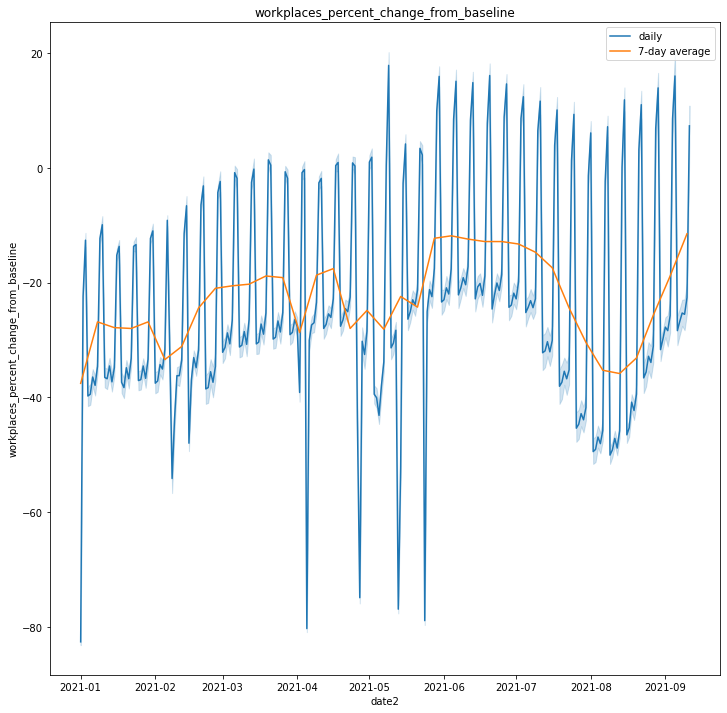

In [8]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date2', y='workplaces_percent_change_from_baseline', data=df_a_province, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date2', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [9]:
def my_find_peaks(data, activity):
    """[Function that finds the index of maxima values in a 1d array]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    #First define empty list
    max_index = []
    
    #Stepwise find value that is higher than previous value, if found save this value.
    value1 = data[activity].iloc[0] #value of activity at first index
    value2 = data[activity].iloc[1] #value of activity at second index
    value3 = 0 #define variable, put value as 0
    
    #loop over all indexed values in data, value1 and value2 are already defined, these are thus exluded:
    for i in data.index:
        if i != 0 and i != 1:
            value3 = data[activity].iloc[i]
            if value2 > value1 and value2 > value3: #maximum if index i is larger than i-1 and than i+1
                max_index.append(i-1)
            value1 = value2 #reset values at new index to commence search for next loop
            value2 = value3
            
    return(max_index)

In [10]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'
data = df_province_agg
max_ind = my_find_peaks(
    data, 
    activity
)
max_ind

[1, 4, 7, 12, 16, 21, 28, 35]

In [11]:
# Assign the data related to the max_ind to df_max
#All values of df province that meet the location found in the search.
df_max = df_province_agg.iloc[max_ind, :]
print(df_max)



        date2  Unnamed: 0  sub_region_2  metro_area  census_fips_code  \
1  2021-01-08     33424.0           NaN         NaN               NaN   
4  2021-01-29     33445.0           NaN         NaN               NaN   
7  2021-02-19     33466.0           NaN         NaN               NaN   
12 2021-03-26     33501.0           NaN         NaN               NaN   
16 2021-04-23     33529.0           NaN         NaN               NaN   
21 2021-05-28     33564.0           NaN         NaN               NaN   
28 2021-07-16     33613.0           NaN         NaN               NaN   
35 2021-09-03     34335.0           NaN         NaN               NaN   

    retail_and_recreation_percent_change_from_baseline  \
1                                          -55.857143    
4                                          -55.714286    
7                                          -43.285714    
12                                         -33.285714    
16                                         -25.57142

In [12]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date2', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date2', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

ValueError: view limit minimum -36902.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36902.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [ ]:
#Find indexes of peaks
peaks = find_peaks(df_province_agg['parks_percent_change_from_baseline'])[0]
print(peaks)



### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [15]:
def my_find_valleys(data, activity):
    """[Function that finds the index of maxima values in a 1d array]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    #First define empty list
    min_index = []
    
    #Stepwise find value that is higher than previous value, if found save this value.
    value1 = data[activity].iloc[0] #value of activity at first index
    value2 = data[activity].iloc[1] #value of activity at second index
    value3 = 0 #define variable, put value as 0
    
    #loop over all indexed values in data, value1 and value2 are already defined, these are thus exluded:
    for i in data.index:
        if i != 0 and i != 1:
            value3 = data[activity].iloc[i]
            if value2 < value1 and value2 < value3: #minimum if index i is smaller than i-1 and than i+1
                min_index.append(i-1)
            value1 = value2 #reset values at new index to commence search for next loop
            value2 = value3
            
    return(min_index)

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

In [16]:
# YOUR CODE HERE
#First all the different activities are put into a list
activities = df_province_agg.columns.tolist()[5:] #activities start at column 4

for activity in activities:
    #Find maximum and minimum using earlier defined functions:
    max_ind7 = my_find_peaks(df_province_agg, activity)
    print("max_ind: " + str(max_ind7))
    
    min_ind7 = my_find_valleys(df_province_agg, activity)
    print("min_ind: " + str(min_ind7))
    
    #Format found indexes such that data is ready for plotting:
    df_max7 = df_province_agg.iloc[max_ind7, :]
    df_min7 = df_province_agg.iloc[min_ind7, :]
  
    #plot the data, both minima and maxima can be displayed in the same figure using different symbols.
    #This part still needs to be in the for loop, since every activity needs to be plotted.
    plt.figure()
    fig, ax = plt.subplots(figsize=(9,9))
    ax.set_title(activity)
    sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
    sns.lineplot(data=df_province_agg, x='date2',y=activity, label='7-day average', ax=ax, alpha=0.7)
    sns.scatterplot(x='date2', y=activity, data=df_max7, label='peaks', ax=ax, marker='^', color='g', s=100)
    sns.scatterplot(x='date2', y=activity, data=df_min7, label='valleys', ax=ax, marker='v', color='r', s=100)
    
    plt.show()

max_ind: [1, 4, 12, 18, 22, 26, 28, 33, 35]
min_ind: [2, 5, 13, 19, 24, 27, 32, 34]


ValueError: view limit minimum -36902.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 0 Axes>

ValueError: view limit minimum -36902.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [ ]:
# I tried comparing using various numpy functions, but then realized that the 
# lists need to be of equal length. Then i tried comparing the index of minima and maxima.
# When that attempt gave this result I took a break. After that break i realized that 
# I shouldn't compare index but date, then I quit. Thats why this exercise isnt finished.

In [28]:
 #Furthermore, this function is very easy compute power wise, which allows for cross-comparison of all activities.
def comparison(cmax, cmin, counter, tolerance):
    for i in cmax:
        print("iterator cmax(i) is at: " + str(i) + " / value cmax is: " + str(cmax[i]))
        for k in cmin:
            print("iterator cmin(k) is at: " + str(k) + " / value cmin is: " + str(cmin[i]))
            if ((cmax[i] >= (cmin[k]-tolerance)) or (cmax[i] <= (cmin[k]+tolerance))):
                counter = counter + 1
                print(counter) #To see what the system is up to
                list_equal.append(cmax) #index of cmax is added to the list
    df_equal_result = df_province_agg.iloc[list_equal, :]
    return df_equal_result

In [29]:
# YOUR CODE HERE
#First try with one variable while the tolerance is varied, this way a sensitivity analysis can be done.
activities = df_province_agg.columns.tolist()[5:6]
list_equal = []


#Two other (empty) lists are defined, one for the maxima and one for the found minima. 
#These are the lists that will be compared later in each loop using the numpy function:
df_max_summary = []
df_min_summary = []    

#For now the loop will only contain one variable, while the sensitivity is figured out.
for activity in activities:
    
      
    #Find maximum and minimum using earlier defined functions:
    max_ind7 = my_find_peaks(df_province_agg, activity)
    print("max_ind: " + str(max_ind7))
    min_ind7 = my_find_valleys(df_province_agg, activity)
    print("min_ind: " + str(min_ind7))
      
   
    for tolerance in range(1,2):
        counter = 0
        df_equal_result = comparison(max_ind7, min_ind7, counter, tolerance)
        df_result = pd.concat([df_equal_result, df_result], axis=1)
        

max_ind: [1, 4, 12, 18, 22, 26, 28, 33, 35]
min_ind: [2, 5, 13, 19, 24, 27, 32, 34]
iterator cmax(i) is at: 1 / value cmax is: 4
iterator cmin(k) is at: 2 / value cmin is: 5
1
iterator cmin(k) is at: 5 / value cmin is: 5
2
iterator cmin(k) is at: 13 / value cmin is: 5


IndexError: list index out of range

## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [376]:
# YOUR CODE HERE
